In [3]:
pip install healpy

     |████████████████████████████████| 18.1 MB 166 kB/s 


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import healpy as hp

In [ ]:
raw_data=np.load('/content/drive/MyDrive/Colab Notebooks/zahra project/cl_planck_lensed.npy')

In [ ]:
ll = raw_data[ :,0]
cl = raw_data[ :,1]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hp.sphtfunc.synfast(cl,32)
raw_map=hp.sphtfunc.synfast(cl, nside=2048)

In [ ]:
shape=raw_map.shape

# **- First Try**
using the functions in the tutorial



In [ ]:
mask1 = np.load('/content/drive/MyDrive/Colab Notebooks/zahra project/cl_planck_lensed.npy').astype(np.bool_)
#a[103]=hp.UNSEEN
map_masked1 = hp.ma(raw_map)
map_masked1.mask = np.logical_not(mask1)

In [ ]:
hp.mollview(map_masked1.filled(),title='masked')
hp.mollview(raw_map , xsize=1500, title='raw')

# **- Second try**

 using an array of zeros to mask the map

In [ ]:
mask2 = np.zeros(shape)
masked_map2 = np.where(mask2, raw_map, hp.UNSEEN)
final = hp.anafast(masked_map2)

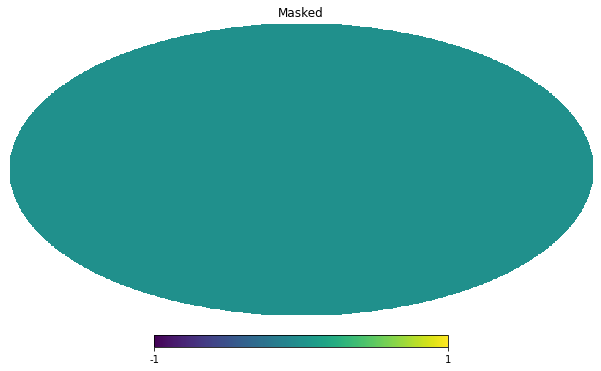

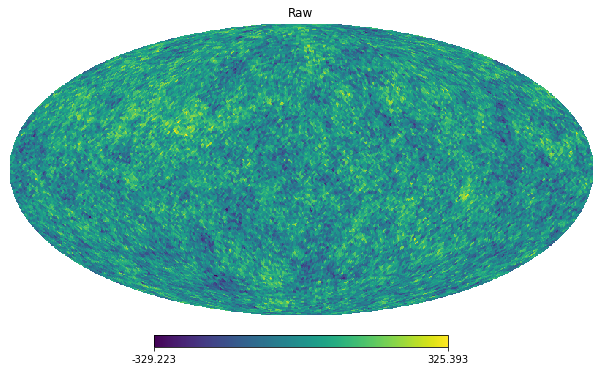

In [ ]:
hp.mollview(final, title='Masked')
hp.mollview(raw_map, title='Raw')

# - **Third try**

partially masking

In [ ]:


m = hp.ma(np.arange(hp.nside2npix(NSIDE), dtype=np.double))
mask = np.zeros(hp.nside2npix(NSIDE), dtype=np.bool)
pixel_theta, pixel_phi = hp.pix2ang(NSIDE, np.arange(hp.nside2npix(NSIDE)))
mask[pixel_theta > np.pi/3] = 1
mask[pixel_phi > np.pi]= 1
m.mask = mask
hp.mollview(m)

-using this method to mask our CMB data

In [ ]:
vec = hp.ang2vec(np.pi/3, np.pi/4)

In [ ]:
ipix_disc = hp.query_disc(nside=2048, vec=vec, radius=np.radians(20))

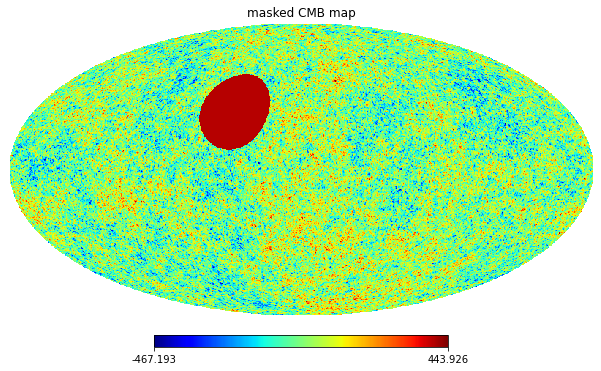

In [ ]:
m = raw_map
m[ipix_disc] = 400
hp.mollview(m, title="masked CMB map" , cmap='jet')

# **- 4th Try**
using a random function as a mask

In [ ]:
mean=np.mean(raw_map)

In [ ]:
SD=np.std(raw_map)

In [ ]:
mask4 = (np.random.choice(raw_map , size=shape))
masked_map4 = np.where(mask4, raw_map, hp.UNSEEN)
final4 = hp.anafast(masked_map4)

In [ ]:
mask4

array([-74.18844745, -43.23356268, -79.87225973, ...,  20.01659417,
       400.        , 142.29828001])

In [ ]:
map_masked4 = hp.ma(raw_map)
map_masked4.mask = np.logical_not(mask4)

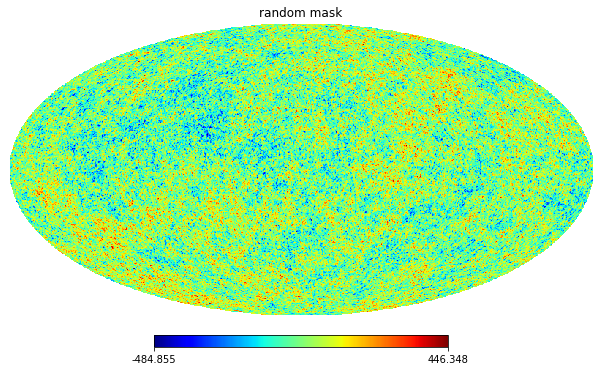

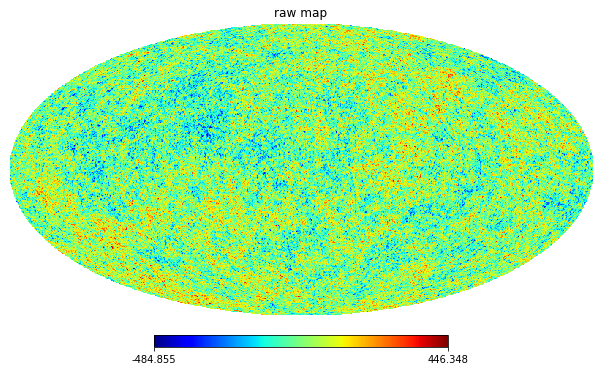

In [ ]:
hp.mollview(map_masked4, title= 'random mask', cmap='jet')
hp.mollview(raw_map , title='raw map',cmap='jet')

# **-5th Try**

using the planck mask

In [ ]:
#pwd

In [ ]:
#cd /content/drive/MyDrive/Colab Notebooks

In [ ]:
#!wget -O COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits "http://pla.esac.esa.int/pla/aio/product-action?MAP.MAP_ID=COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits"


In [ ]:
mask5 = hp.read_map('/content/drive/MyDrive/Colab Notebooks/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits').astype(np.bool_)
map_masked5 = hp.ma(raw_map)
map_masked5.mask = np.logical_not(mask5)

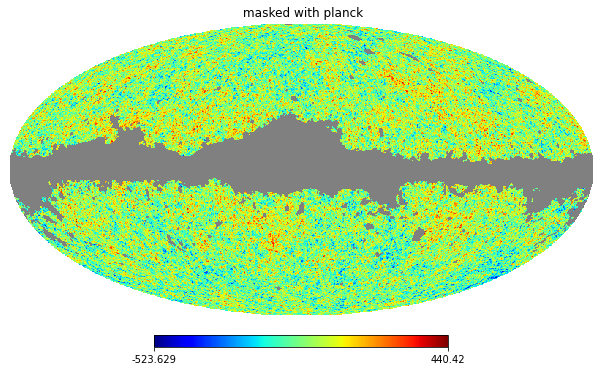

In [ ]:
hp.mollview(map_masked5, title= ' masked with planck', cmap='jet')